# Problem 1: Graph Laplacians

### 1 (a)

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def cycle(n):
    A_cycle = np.zeros((n, n), dtype=int)
    for i in range(n):
        A_cycle[i, (i - 1) % n] = 1  # Connect to previous node
        A_cycle[i, (i + 1) % n] = 1  # Connect to next node
    return A_cycle

# 2. Spoke and Wheel Graph
def wheel(n):
    A_wheel = np.zeros((n, n), dtype=int)
    for i in range(n - 1):
        A_wheel[i, (i + 1) % (n - 1)] = 1  # Outer cycle
        A_wheel[(i + 1) % (n - 1), i] = 1
    A_wheel[n - 1, :-1] = 1  # Connect center to all outer nodes
    A_wheel[:-1, n - 1] = 1
    return A_wheel

# 3. Line Graph
def line(n):
    A_line = np.zeros((n, n), dtype=int)
    for i in range(n - 1):
        A_line[i, i + 1] = 1
        A_line[i + 1, i] = 1
    return A_line

# 4. Line Graph + a Point
def line_point(n):
    A_line_point = np.zeros((n,n), dtype=int)
    for i in range(n - 1):
        A_line_point[i, i+1] = 1 # do the regular line grpah
        A_line_point[i+1, i] = 1
        A_line_point[n - 1, i] = 1  # Connect last node to all other nodes
        A_line_point[i, n - 1] = 1
    return A_line_point

def laplacian(A_graph):
    return np.diag(np.sum(A_graph, axis=0)) - A_graph

print('Cycle laplacian:\n', laplacian(cycle(7)))
print('Spoke and wheel laplacian:\n', laplacian(wheel(7)))
print('Line graph laplacian:\n', laplacian(line(7)))
print('Line point laplacian:\n', laplacian(line_point(7)))

Cycle laplacian:
 [[ 2 -1  0  0  0  0 -1]
 [-1  2 -1  0  0  0  0]
 [ 0 -1  2 -1  0  0  0]
 [ 0  0 -1  2 -1  0  0]
 [ 0  0  0 -1  2 -1  0]
 [ 0  0  0  0 -1  2 -1]
 [-1  0  0  0  0 -1  2]]
Spoke and wheel laplacian:
 [[ 3 -1  0  0  0 -1 -1]
 [-1  3 -1  0  0  0 -1]
 [ 0 -1  3 -1  0  0 -1]
 [ 0  0 -1  3 -1  0 -1]
 [ 0  0  0 -1  3 -1 -1]
 [-1  0  0  0 -1  3 -1]
 [-1 -1 -1 -1 -1 -1  6]]
Line graph laplacian:
 [[ 1 -1  0  0  0  0  0]
 [-1  2 -1  0  0  0  0]
 [ 0 -1  2 -1  0  0  0]
 [ 0  0 -1  2 -1  0  0]
 [ 0  0  0 -1  2 -1  0]
 [ 0  0  0  0 -1  2 -1]
 [ 0  0  0  0  0 -1  1]]
Line point laplacian:
 [[ 2 -1  0  0  0  0 -1]
 [-1  3 -1  0  0  0 -1]
 [ 0 -1  3 -1  0  0 -1]
 [ 0  0 -1  3 -1  0 -1]
 [ 0  0  0 -1  3 -1 -1]
 [ 0  0  0  0 -1  2 -1]
 [-1 -1 -1 -1 -1 -1  6]]


### 1(b)

In [15]:
A_cycle = cycle(150)
L_cycle = laplacian(A_cycle)
A_wheel = wheel(150)
L_wheel = laplacian(A_wheel)
A_line = line(150)
L_line = laplacian(A_line)
A_line_point = line_point(150)
L_line_point = laplacian(A_line_point)

In [16]:
def plot_eigenvectors(matrix):
    """
    Computes the eigenvalues and eigenvectors of a given matrix,
    sorts them, and plots the eigenvectors corresponding to the smallest,
    second smallest, largest, and second largest eigenvalues.
    Additionally, the smallest eigenvector is plotted separately with a better scale.
    """
    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(matrix)

    # Sort eigenvalues and get corresponding indices
    sorted_indices = np.argsort(eigenvalues)

    # Select indices for required eigenvectors
    smallest_idx = sorted_indices[0]
    second_smallest_idx = sorted_indices[1]
    second_largest_idx = sorted_indices[-2]
    largest_idx = sorted_indices[-1]

    # Get corresponding eigenvectors
    smallest_eigenvector = eigenvectors[:, smallest_idx]
    second_smallest_eigenvector = eigenvectors[:, second_smallest_idx]
    second_largest_eigenvector = eigenvectors[:, second_largest_idx]
    largest_eigenvector = eigenvectors[:, largest_idx]

    # Plot the main eigenvectors
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(smallest_eigenvector, marker='o', linestyle='-', alpha=0.7)
    plt.title(f"Smallest Eigenvalue ({eigenvalues[smallest_idx]:.4f})", fontsize=14)
    plt.xlabel("Index", fontsize=12)
    plt.ylabel("Component", fontsize=12)
    plt.ylim(np.min(smallest_eigenvector) - 0.05, np.max(smallest_eigenvector) + 0.05)  # Better scaling

    plt.subplot(2, 2, 2)
    plt.plot(second_smallest_eigenvector, marker='o', linestyle='-')
    plt.title(f"Second Smallest Eigenvalue ({eigenvalues[second_smallest_idx]:.4f})")
    plt.xlabel("Index")
    plt.ylabel("Component")
    plt.ylim(np.min(second_smallest_eigenvector) - 0.05, np.max(second_smallest_eigenvector) + 0.05)

    plt.subplot(2, 2, 3)
    plt.plot(second_largest_eigenvector, marker='o', linestyle='-')
    plt.title(f"Second Largest Eigenvalue ({eigenvalues[second_largest_idx]:.4f})")
    plt.xlabel("Index")
    plt.ylabel("Component")
    plt.ylim(np.min(second_largest_eigenvector) - 0.05, np.max(second_largest_eigenvector) + 0.05)

    plt.subplot(2, 2, 4)
    plt.plot(largest_eigenvector, marker='o', linestyle='-')
    plt.title(f"Largest Eigenvalue ({eigenvalues[largest_idx]:.4f})")
    plt.xlabel("Index")
    plt.ylabel("Component")
    plt.ylim(np.min(largest_eigenvector) - 0.05, np.max(largest_eigenvector) + 0.05)

    plt.tight_layout()
    plt.show()

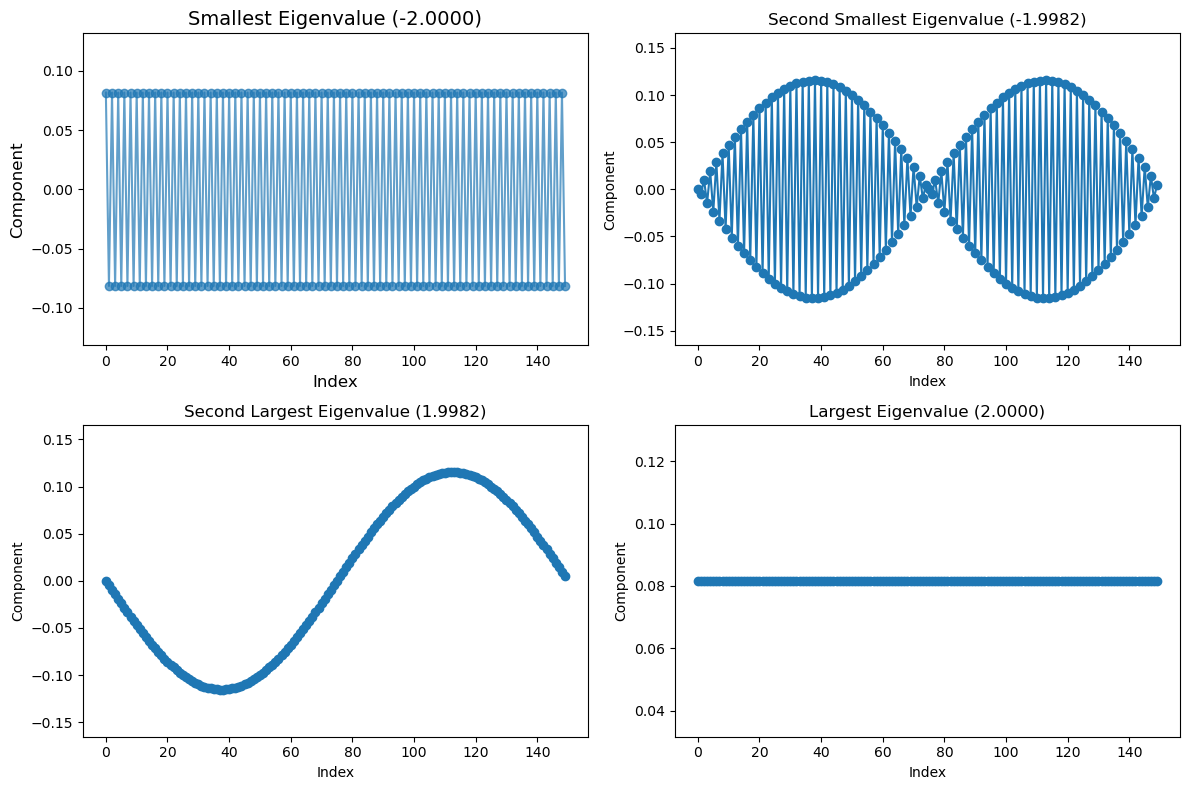

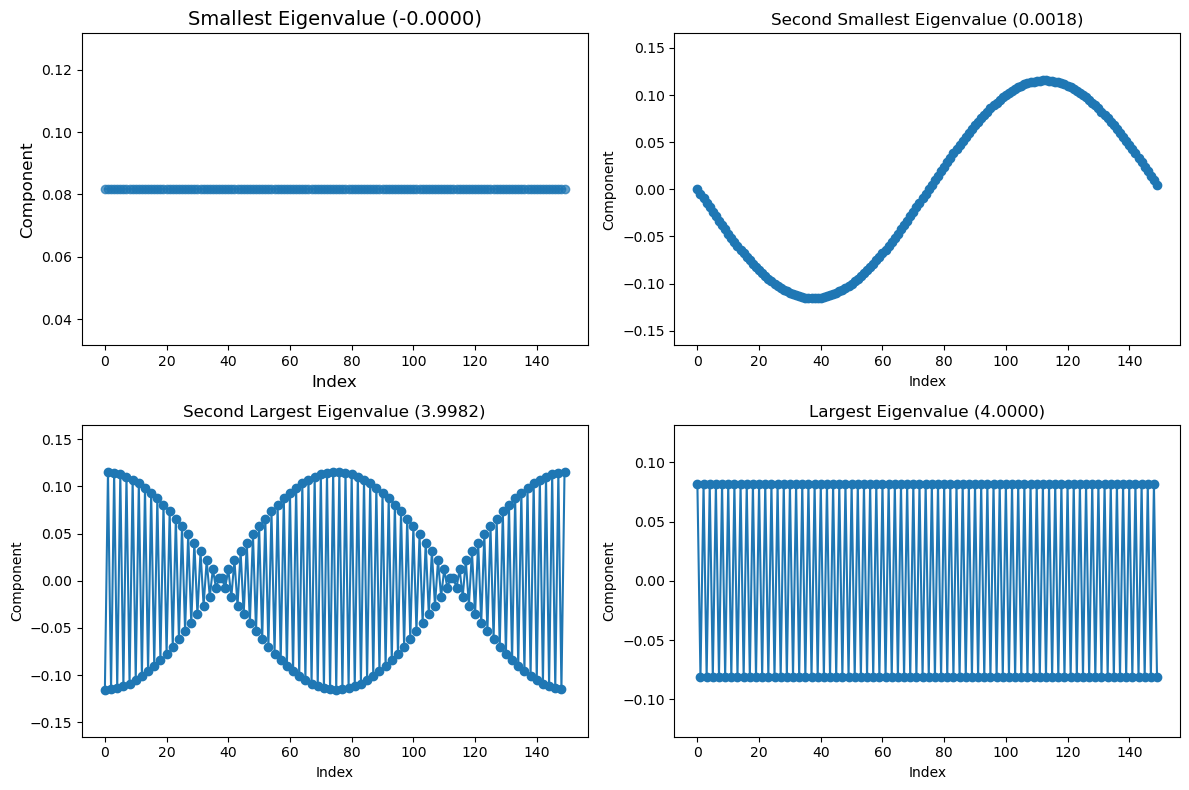

In [17]:
plot_eigenvectors(A_cycle)
plot_eigenvectors(L_cycle)

Since this graph is a cycle, you would suspect all the graphs to be invariant over cyclic permutations of the indices. That's why you get these oscillations. The largest eigenvector, which wants to repel neighbors, is able to do so perfectly by assigning each neighbor a different color (I suspect this would look different if we had an odd cycle). The second largest eigenvector does relatively the same thing but has to look slightly different as it is orthogonal to the first. The smallest eigenvector is of course the all 1s vector, and the second smallest eigenvector, which represents clusters, oscillates up and down. You would want close neighbors to be close, and ones that are far to be far. However, it increases up to a point, and then because you can wrap around, the distances start actually getting smaller, which is why it goes back down. Notice the contrast with the line graph below.

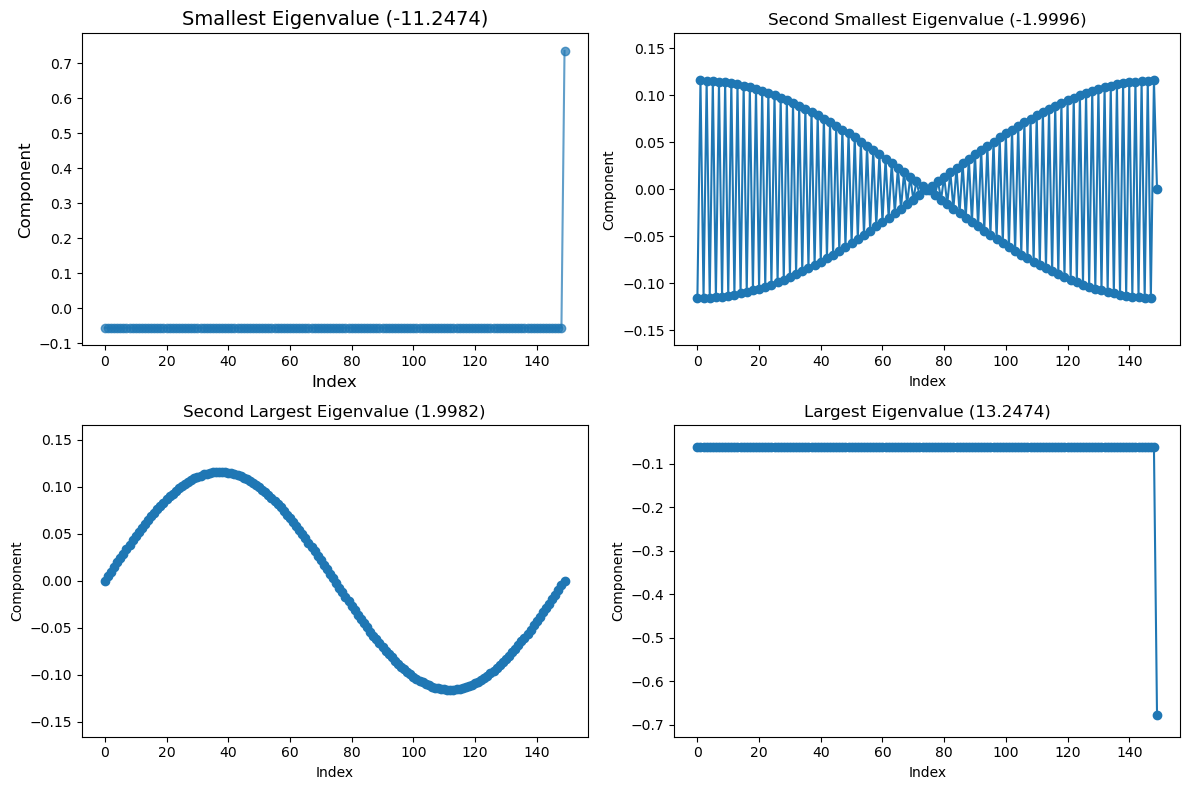

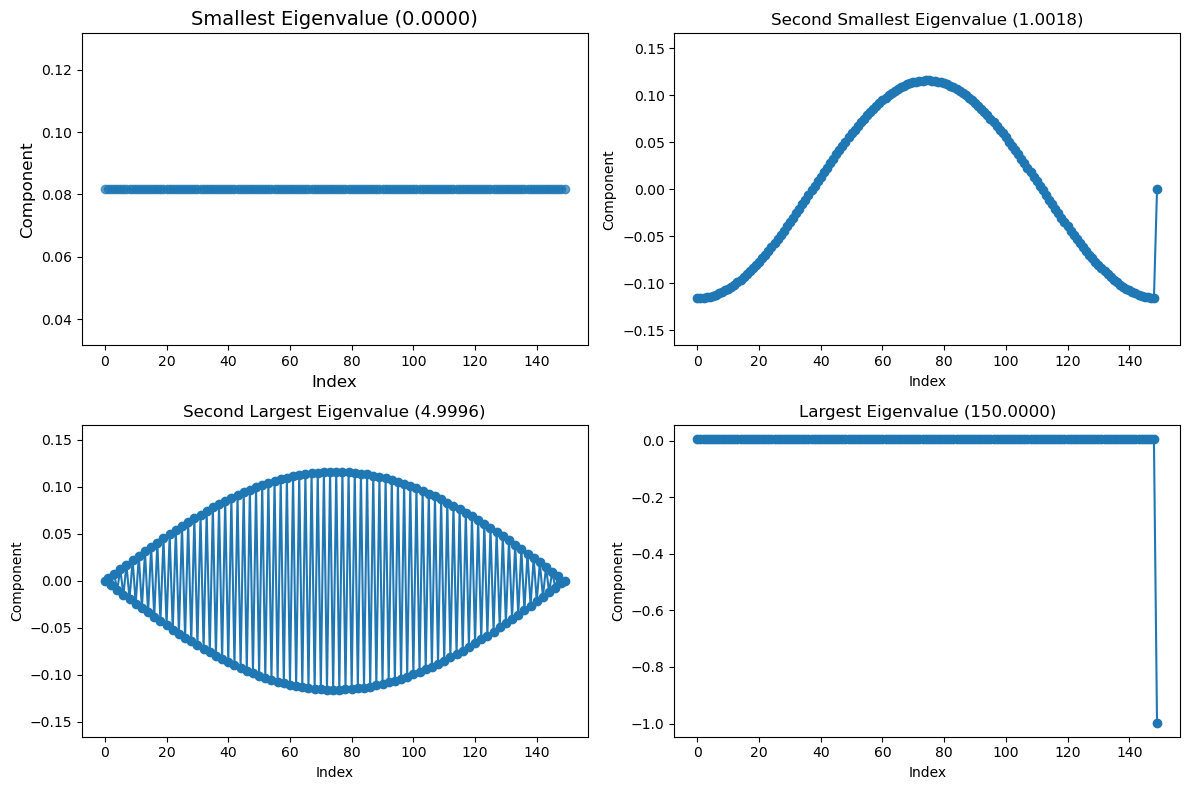

In [18]:
plot_eigenvectors(A_wheel)
plot_eigenvectors(L_wheel)

The second smallest eigenvector is symbolic of clustering. For this graph, every vertex is at most distance 2 away from each other. So you would naturally want The points that are 1 away from each other in the same cluster. Then just by the nature of the graph you would want those that are 2 away to be a fit further. Putting this together, you get an increase then a gradual decrease. Since the graph is a cycle, you would expect it to end and start at around the same point. Finally, as below, the last node is connected to everything else, so it can go in any cluster, so in expectation it outputs 0. The largest eigenvector is clear, to maximize the energy, or separate neighbors most effectively, you would have all the outer nodes in one cluster and the center in its own. But if you want something orthogonal to this, you would necessarily need something that oscillates like on the second smallest eigenvector.

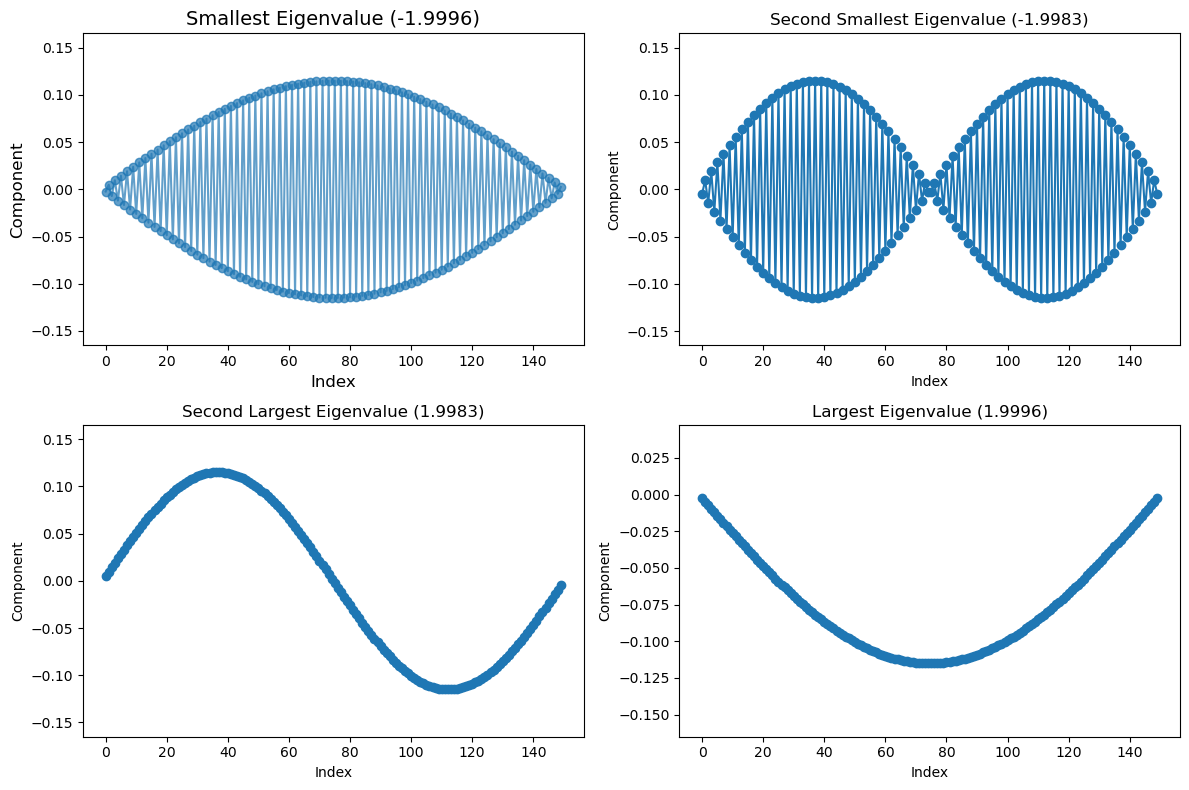

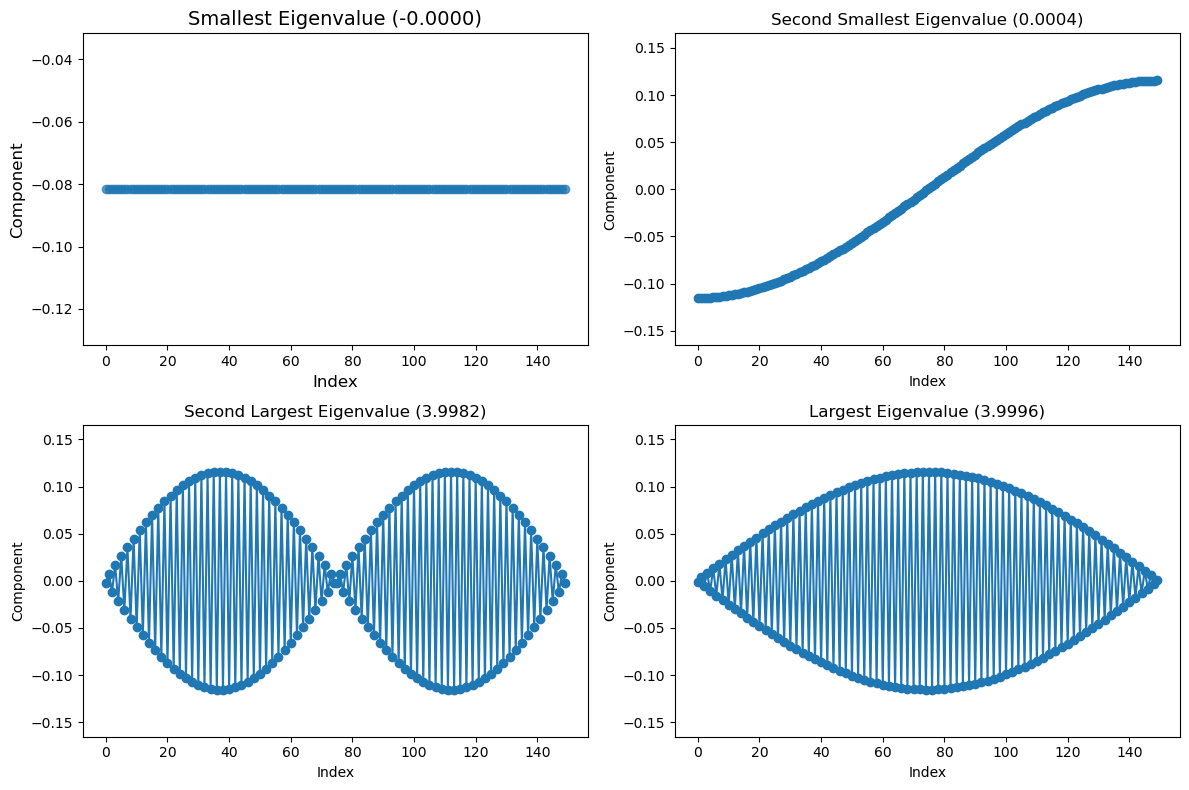

In [19]:
plot_eigenvectors(A_line)
plot_eigenvectors(L_line)

The smallest eigenvector is the all 1s. The second smallest eigenvector, symbolic of clustering, gradually increases over time. This is related to how the line graph looks. You would want close things to be in the same cluster, but far away points to be far away. This is why the first and last point have the largest gap. Following this intuition, you would get a gradual increase.
The largest eigenvector is related to neighbors repelling. This would be a 2-coloring, and indeed since the line is perfectly 2 colorable, that is what you get here. The second largest eigenvector is symbolic of repelling too, but must be orthogonal to the first. Since this one really can be 2-colored, you get almost the same picture but with double the frequency as to make it orthogonal.

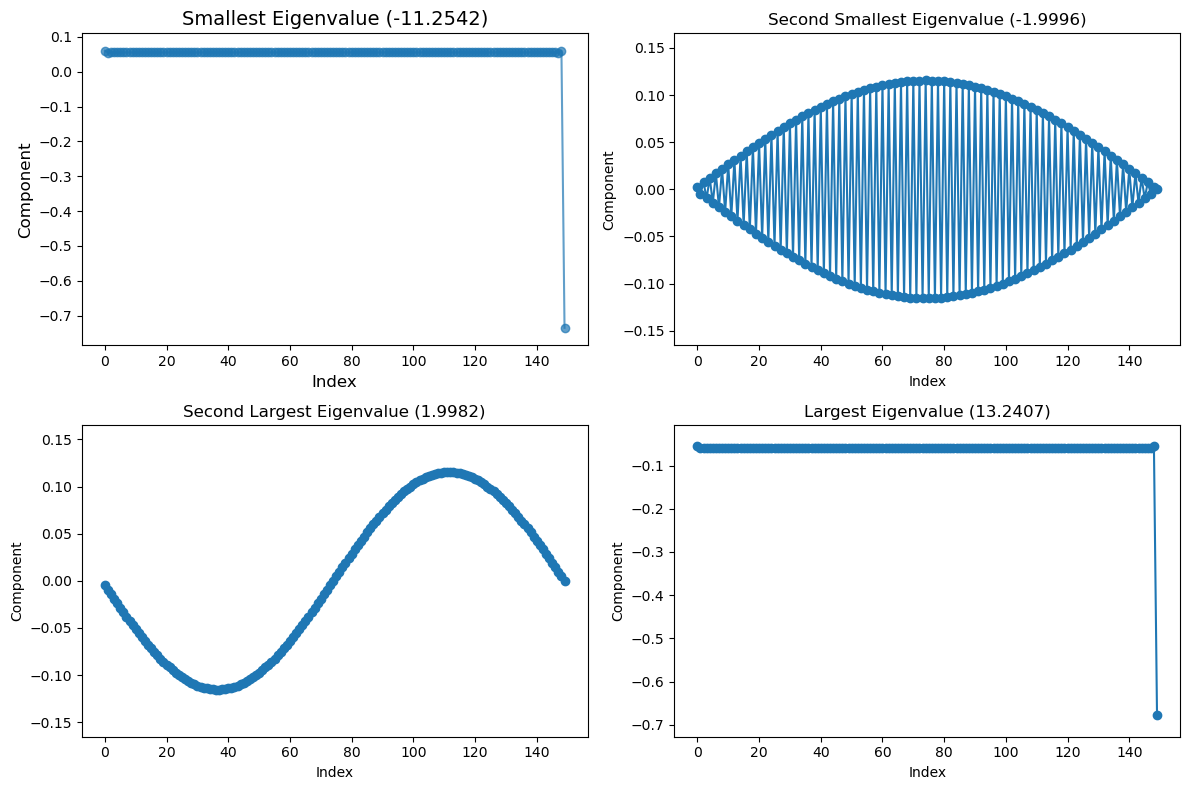

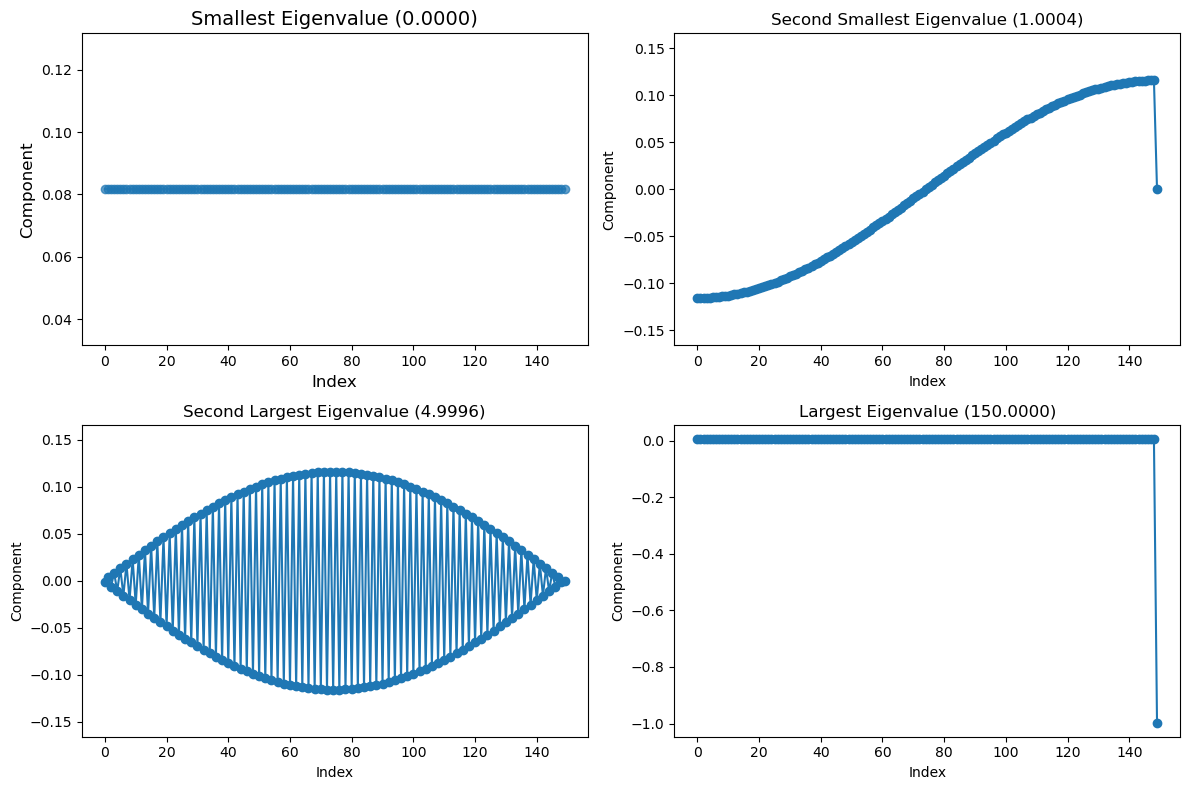

In [20]:
plot_eigenvectors(A_line_point)
plot_eigenvectors(L_line_point)

Like before the smallest eigenvector of the laplacian graph is the all 1s vector. The second smallest eigenvector gives a good clustering. In this case, it gives a very similar graph to the line graph. However, the 150th point has a value of 0. I believe this happens because the last point, being connected to everything, could go into any clustering equally, so it just gets confused and outputs 0 (equivalently, it would be 0 in expectation).
The largest eigenvector is symbolic of a coloring, where neighbors repel themselves. Indeed, with the last point connected to everything, every other point would want to repel the last point, so that's why its off on its own while the rest are together. The second largest eigenvector captures repelling too, but an orthogonal direction to the first, which is why it gives an alternating structure symbolic of a 2-coloring of a cycle. It is kind of forced to look like this since it has to be orthogonal to the largest eigenvector which is mostly the same value.

### 1(f)
The frobenius norm squared of the difference between the Laplacian of the cycle and Laplacian of the spoke and wheel graph (with $n$ vertices) is:
$$1^2(n-1) + (n-3)^2 + 1^2 \cdot 2 \cdot (n-3) = n^2 - 3n + 2$$

The frobenius norm squared for cycle vs line is just 4.

The frobenius norm squared for cycle vs line and point is:
$$1^2(n-3) + (n-3)^2 1^2 + 1^2 \cdot 2 \cdot (n-3) = n(n-3)$$

As you can see, the spoke and wheel graph and line and point are extremely different from the cycle (they give huge values for $n=150$). The frobenius norm is the sum of the eigenvalues. Since cycle vs line has a really small frobenius norm (just 4), the eigenvalues must be close. The graphs are really similar in structure, so we would expect the eigenvectors to be very similar too. Basically, these matrices are extremely similar, which is represented in the frobenius norm, which is why we get similar pictures.

On the other hand, the frobenius norm of cycle vs spoke & wheel and line & point are very different. This means these matrices are very different from each other, and accordingly, we get huge eigenvalues for spoke & wheel and line & point and small ones (like 4) for cycle. These graphs & matrices have very different structure, again captured by the frobenius norm, so we get different clusterings.

### 1(g)

In [21]:
from scipy.spatial.distance import cdist

np.random.seed(0)
points = np.random.uniform(0, 2, (600,2))
dist = cdist(points, points)
A = (dist <= 1/2).astype(float)

In [22]:
print(A)
assert np.all(A == A.T), "A is not symmetric!"

[[1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [23]:
L = laplacian(A)
eigenvalues, eigenvectors = np.linalg.eigh(L)
v2 = eigenvectors[:, 1]
v3 = eigenvectors[:, 2]

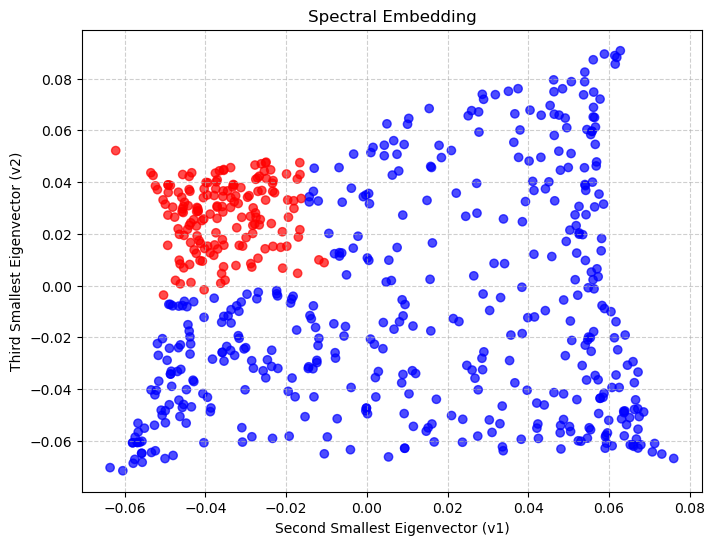

In [24]:
def plot_spectral_embedding(v1, v2, with_colors=True):
    """
    Plots the spectral embedding of a graph using the second and third smallest eigenvectors,
    coloring points differently based on a condition.

    Condition: Points where v1 < 1 and v2 < 1 are colored red, others are blue.

    Parameters:
        v1 (numpy.ndarray): The second smallest eigenvector.
        v2 (numpy.ndarray): The third smallest eigenvector.
    """
    # Define colors based on the condition (v1[i] < 1 and v2[i] < 1)
    colors = np.where((points[:,0] < 1) & (points[:,1] < 1), 'r', 'b')

    # Scatter plot with colors
    plt.figure(figsize=(8, 6))
    if with_colors:
        plt.scatter(v1, v2, c=colors, alpha=0.7)
    else:
        plt.scatter(v1, v2, alpha=0.7)
    plt.xlabel("Second Smallest Eigenvector (v1)")
    plt.ylabel("Third Smallest Eigenvector (v2)")
    plt.title("Spectral Embedding")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

# Plot with the condition applied
plot_spectral_embedding(v2, v3)


Red above is where both coordinates have value $<1$. From a heuristic point of view, this should happen around 1/4 of the time, which it looks like it relatively speaking does. All those points that have coordinate $<1$ seem to be in one cluster. This of course makes sense, because if two pairs of points have all coordinates < 1, they are much more likely to be within 1/2 of each other than points than between a point with both coordinates < 1 and another that has some coordinate > 1. So it would be natural that they form a good cluster, which is what the red seems to represent.

### 1(h)

In [25]:
import networkx as nx

def create_grid_graph(n):
    """
    Creates an n x n grid graph where nodes are (i, j) for 1 ≤ i, j ≤ n,
    and edges exist between adjacent nodes including diagonals.

    Parameters:
        n (int): The grid size (n x n).

    Returns:
        G (networkx.Graph): The generated grid graph.
    """
    G = nx.Graph()

    for i in range(1, n + 1):
        for j in range(1, n + 1):
            # Current node
            G.add_node((i, j))

            # Add edges to neighbors (including diagonals)
            for di in [-1, 0, 1]:
                for dj in [-1, 0, 1]:
                    if di == 0 and dj == 0:
                        continue  # Skip self-loop

                    ni, nj = i + di, j + dj
                    if 1 <= ni <= n and 1 <= nj <= n:
                        G.add_edge((i, j), (ni, nj))

    return G

# Create the 100x100 grid graph
grid_graph = create_grid_graph(100)

In [26]:
from scipy.sparse import csr_matrix

# Compute the sparse Laplacian matrix
L_sparse = nx.laplacian_matrix(grid_graph).astype(np.float64)

# Convert to CSR format for efficient operations
L_sparse = csr_matrix(L_sparse)

# Check the shape and number of nonzero elements
L_shape = L_sparse.shape  # Should be (10000, 10000)
L_nonzero = L_sparse.nnz  # Number of nonzero entries

L_shape, L_nonzero

((10000, 10000), 88804)

In [27]:
from scipy.sparse.linalg import eigsh

# Compute the second and third smallest eigenvalues and eigenvectors
k = 3  # Get the first three smallest eigenvalues
eigenvalues, eigenvectors = eigsh(L_sparse, k=k, which='SM')  # 'SM' = Smallest Magnitude

# Extract the second and third smallest eigenvectors
v2 = eigenvectors[:, 1]  # Second smallest eigenvector
v3 = eigenvectors[:, 2]  # Third smallest eigenvector

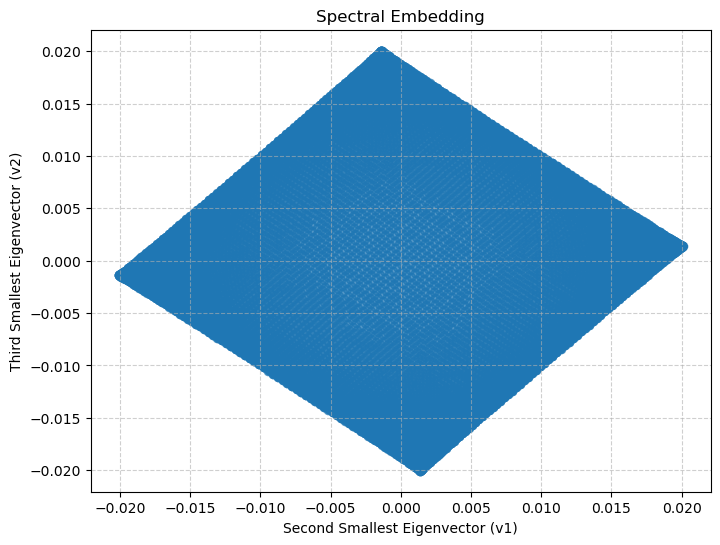

In [28]:
plot_spectral_embedding(v2, v3, with_colors=False)

In [29]:
import random

def remove_random_nodes(G, num_nodes=100):
    """
    Removes a specified number of random nodes from the graph.

    Parameters:
        G (networkx.Graph): The input graph.
        num_nodes (int): Number of nodes to remove.

    Returns:
        G_new (networkx.Graph): A copy of the graph with the nodes removed.
    """
    G_new = G.copy()  # Make a copy of the original graph
    nodes_to_remove = random.sample(list(G.nodes()), num_nodes)  # Select random nodes
    G_new.remove_nodes_from(nodes_to_remove)  # Remove nodes
    return G_new

# Remove 100 random nodes from the 100x100 grid graph
grid_graph_modified = remove_random_nodes(grid_graph, num_nodes=100)

# Display the new number of nodes and edges
num_nodes_modified = grid_graph_modified.number_of_nodes()
num_edges_modified = grid_graph_modified.number_of_edges()

num_nodes_modified, num_edges_modified

(9900, 38620)

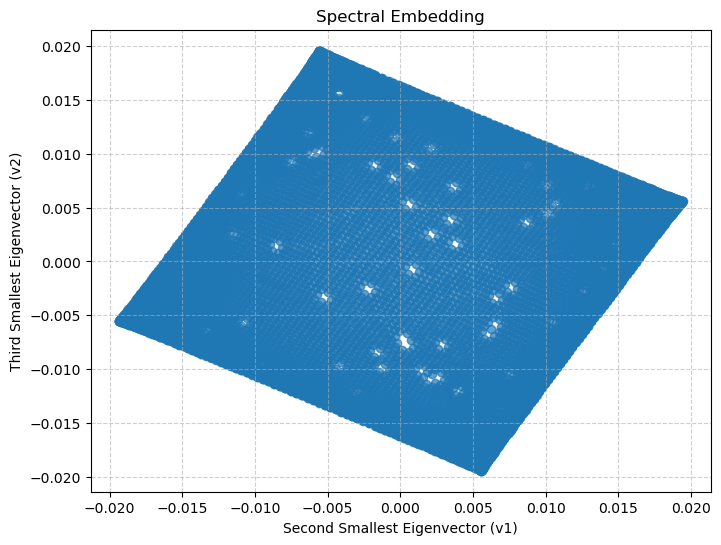

In [30]:
# Compute the new Laplacian matrix after node removal
L_sparse_modified = nx.laplacian_matrix(grid_graph_modified).astype(np.float64)

# Compute the second and third smallest eigenvectors
eigenvalues_modified, eigenvectors_modified = eigsh(L_sparse_modified, k=3, which='SM')

# Extract the second and third smallest eigenvectors
v2_modified = eigenvectors_modified[:, 1]  # Second smallest eigenvector
v3_modified = eigenvectors_modified[:, 2]  # Third smallest eigenvector

# Plot the new spectral embedding
plot_spectral_embedding(v2_modified, v3_modified, with_colors=False)

This looks basically the same as the rotated square as before, but with some punctured holes in them. This is representative of how the original graph looks, with the vertices we removed becoming those punctured holes. I believe this means that the spectral embedding is a very robust algorithm.

# Problem 2: Finding Friends

In [31]:
import pandas as pd

# Load the CSV file as a dataframe
file_path = "friends.csv"  # Update with actual file path
df = pd.read_csv(file_path, header=None, names=["Person1", "Person2"])

# Create an undirected graph from the edge list
G = nx.from_pandas_edgelist(df, "Person1", "Person2")

# Display basic graph information
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

num_nodes, num_edges

(1495, 30898)

[-1.16193870e-16  7.21575441e-18  9.91985386e-17  2.74490306e-16
  8.53826652e-04  3.48547320e-03  5.91998699e-03  9.46724366e-03
  1.80891187e-02  2.63284256e-02  2.74804241e-02  3.80046703e-02]


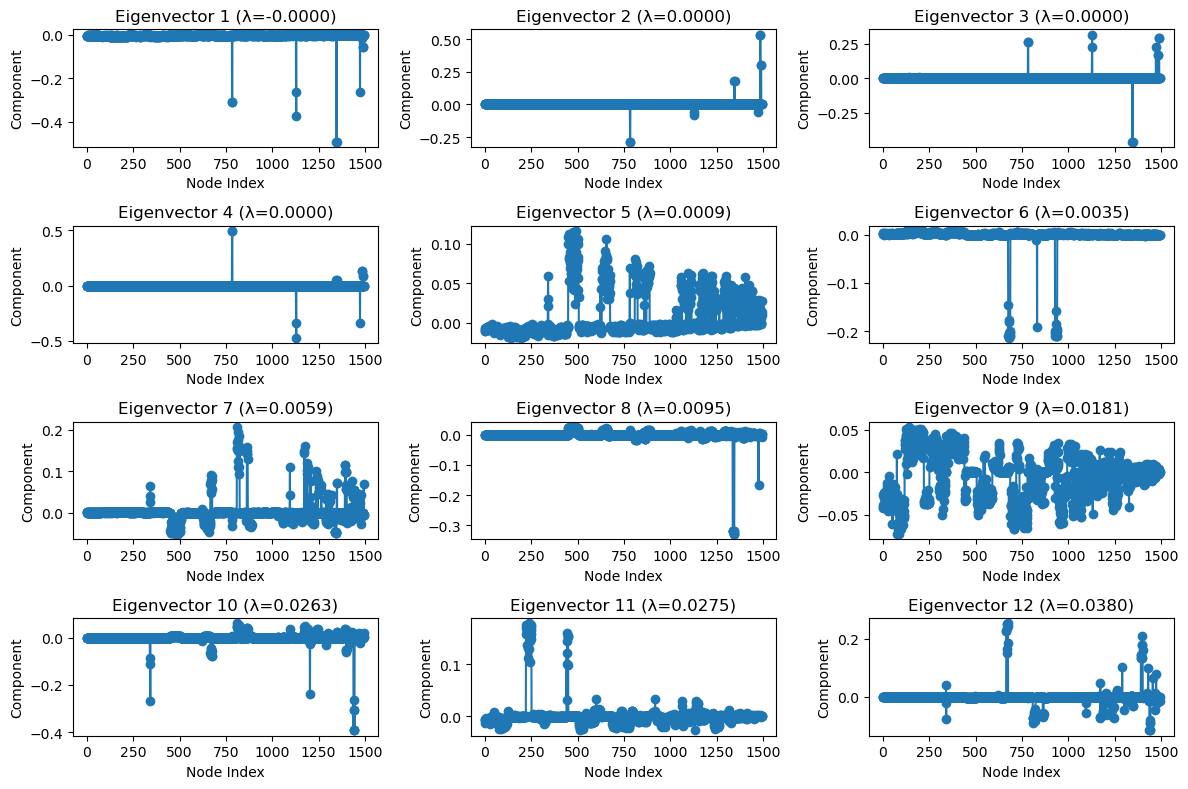

[0.00274538 0.00214489 0.00295156 ... 0.00031287 0.0005419  0.00031287]


In [33]:
# Compute the sparse Laplacian matrix
L = nx.normalized_laplacian_matrix(G).astype(np.float64)

# Compute the 12 smallest eigenvalues and eigenvectors
eigenvalues, eigenvectors = eigsh(L, k=12, which='SM')

print(eigenvalues)

# Plot the 12 smallest eigenvectors
plt.figure(figsize=(12, 8))
for i in range(12):
    plt.subplot(4, 3, i+1)  # Arrange in 4x3 grid
    plt.plot(eigenvectors[:, i], marker='o', linestyle='-')
    plt.title(f"Eigenvector {i+1} (λ={eigenvalues[i]:.4f})")
    plt.xlabel("Node Index")
    plt.ylabel("Component")

plt.tight_layout()
plt.show()

print(eigenvectors[:, 2])

As we can see above, there are 6 eigenvalues of 0. We can recover the $k$th connected component for $1 \leq k \leq 6$ by letting $v^k$ be the $k$th smallest eigenvector and $C_k = \{u \in V : v^k_u \neq 0\}$.

In [36]:
def compute_conductance(G, S):
    """
    Computes the conductance of the cut (S, S̄) in graph G.
    """
    vol_S = sum(G.degree(n) for n in S)
    cut_S = sum(1 for u in S for v in G[u] if v not in S)
    vol_V = sum(dict(G.degree()).values())
    return cut_S / min(vol_S, vol_V - vol_S)

def spectral_conductance(G):
    """
    Finds the subset of nodes with the smallest conductance using spectral methods.
    """
    # Compute the normalized Laplacian matrix
    L = nx.normalized_laplacian_matrix(G).astype(float)

    # Compute the Fiedler vector (second smallest eigenvector)
    eigenvalues, eigenvectors = eigsh(L, k=8, which='SM')
    fiedler_vector = eigenvectors[:, 6]
    print(eigenvalues[6])

    # Sort nodes by Fiedler vector values
    nodes_sorted = [node for _, node in sorted(zip(fiedler_vector, G.nodes()))]

    # Evaluate conductance for different cuts
    best_S, best_cond = None, float('inf')
    for i in range(200, len(nodes_sorted)-200):
        S = set(nodes_sorted[:i])
        cond = compute_conductance(G, S)
        if cond < best_cond:
            best_S, best_cond = S, cond
        if cond < 0.1:
            print(f'the set {S} has conductance {cond}')

    return best_S, best_cond

# Example usage
best_subset, min_conductance = spectral_conductance(G)
print(len(best_subset))
print("Best subset of nodes with smallest conductance:", best_subset)
print("Minimum conductance:", min_conductance)

0.003485473200481496
the set {2, 4, 8, 11, 13, 21, 25, 41, 43, 54, 55, 60, 66, 71, 76, 83, 84, 89, 92, 95, 111, 115, 122, 129, 133, 138, 140, 150, 151, 152, 155, 160, 163, 170, 177, 187, 190, 192, 193, 198, 201, 204, 205, 206, 217, 223, 226, 228, 231, 233, 235, 247, 248, 249, 251, 255, 256, 263, 276, 279, 284, 288, 289, 293, 295, 306, 314, 318, 325, 328, 332, 335, 344, 352, 355, 356, 367, 371, 386, 388, 390, 396, 398, 399, 403, 407, 415, 416, 418, 420, 424, 426, 436, 438, 439, 440, 445, 449, 450, 451, 453, 456, 457, 461, 462, 466, 471, 477, 485, 488, 498, 502, 506, 510, 512, 513, 519, 520, 521, 527, 530, 538, 540, 542, 545, 547, 552, 554, 558, 563, 573, 579, 581, 584, 593, 594, 595, 599, 608, 615, 630, 643, 657, 663, 674, 677, 679, 699, 707, 709, 715, 720, 723, 724, 739, 748, 759, 760, 763, 764, 765, 769, 774, 781, 789, 796, 801, 802, 804, 812, 816, 819, 820, 824, 825, 831, 833, 836, 837, 841, 842, 851, 858, 866, 873, 876, 889, 891, 896, 899, 912, 920, 924, 926, 931, 935, 937, 941, 944

Take this set and add 3 random nodes not in it.

In [43]:
for _ in range(10):
    random_subset = set(random.sample(list(G.nodes()), 200))
    print(f'Conductance of random subset: {compute_conductance(G, random_subset)}')

Conductance of random subset: 0.8478465891229173
Conductance of random subset: 0.8873684210526316
Conductance of random subset: 0.8723350573987637
Conductance of random subset: 0.8645857241221023
Conductance of random subset: 0.8687306501547988
Conductance of random subset: 0.862488306828812
Conductance of random subset: 0.8714285714285714
Conductance of random subset: 0.8704537582265327
Conductance of random subset: 0.8664112999760594
Conductance of random subset: 0.8585929296464824
